# TD 5 : Le réseau de Hopfield
---

Le modèle de Hopfield était pionnier pour décrire la capacité d'un réseau de neurone à rétenir des motifs en mémoire via ses connexions synaptiques, et des mécanismes de récupération de cette mémoire à partir d'un petit indice via une dynamique d'attracteur.


### La définition du modèle

Dans sa définition probabiliste, la dynamique du réseau est décrite par les équations suivantes :

 0. L'activité d'un neurone $i$ (parmi $N$ neurones en total) dans un interval de temps $[t, t+\Delta t]$ est décrit par une variable binaire $S_i(t)\in \{-1,1\}$. Si le neurone est actif dans cet interval, $S_i(t)=1$, sinon $S_i(t)=-1$.
 
 
 1. La matrice de connectivité étant donnée par $w_{ij}$, chaque neurone reçoit une entrée 
    $$h_i(t) = \sum_{j=1\ldots N} w_{ij}S_j(t)$$
    au temps $t$, qui dépend des poids synaptiques entre les neurones présynaptiques $j$ et le neurone postsynaptique $i$ ainsi que l'état des neurones présynaptiques à temps $t$.
    
    
 2. A chaque pas de temps, l'état de chaque neurone $S_i$, $i=1\ldots N$, est mis à jour en fonction de l'état de tous les neurones au temps précédent via les entrées qu'il reçoit. La probabilité que le neurone est actif est donnée par
    $${\rm prob}[S_i(t+\Delta t) = 1] = g(h_i(t)),$$
    où la fonction de gain $g$ est souvent choisie comme
    $$g(h_i) = \frac{1}{1+e^{-\beta h_i}}.$$
    (La probabilité que $S_i(t+\Delta t) = 1$ est donnée par $1-g(h_i)$.) Dans l'expression donnée pour $g$, $\beta$ joue le rôle d'une témperature inverse : dans la limite $\beta\to\infty$, la dynamique devient déterministe, et $S_i(t+\Delta t) = 1$ si $h_i(t)>0$, et $S_i(t+\Delta t) = -1$ si $h_i(t)>0$.


Le réseau de Hopfield peut stocker des *motifs* qui correspondent à l'activité spécifique d'un sous-ensemble de neurones ; on dit qu'un motif est réproduit par le réseau si l'*overlap* entre l'état du réseau et le motif est proche de 1. Les motifs étant définis comme 
$$ P_i^\mu \in \{-1,1\},\, i=1\ldots N,\,\mu=1\ldots K,$$
l'**overlap** $m^\nu(t)$ entre le motif $\nu$ et l'état du réseau à temps $t$ est donné par
$$ m^\nu(t) = \frac{1}{N}\sum_{i=1\ldots N} P^\nu_i S_i(t).$$


### La matrice de connectivité

Comment choisir la matrice de connectivité pour que le réseau évolue vers un motif "enregistré" ?

La solution proposée par Hopfield consiste à utiliser la connectivité suivante :

$$ w_{ij} = \frac{1}{N}\sum_{\mu=1\ldots K} P_i^\mu P_j^\mu .$$

(De manière générale, les connexions entre un neurone et lui-même, caracterisé par $w_{ii}$, ne sont pas admises, c'est-à-dire on enforce $w_{ii}=0$ après application de la connectivité ci-dessus.) 

Puisque les $P_i^\mu\in\{-1,1\}$, s'il n'y a qu'un seul motif ($K=1$), alors les poids prennnent également juste deux valeurs, $w_{ij}\in \{-1/N,1/N\}$. Par contre, si le nombre de motifs augmente ($K>1$), cela n'est plus vrai et les poids (toujours obéissant cette définition) peuvent prendre des valeurs différentes entre $[-K/N,K/N]$.

### Exercise 1 : Le rôle de l'overlap

1. Montrez qu'avec les définitions de $h_i$ et $w_{ij}$ ci-dessus, la dynamique peut être  exprimé en fonction des overlaps respectifs avec les différents motifs,
$${\rm prob}[S_i(t+\Delta t) = 1] = g(\sum_{\mu=1\ldots K} P_i^\mu m^\mu(t)).$$

Cela revient à dire que $h_i(t) = \sum_{\mu=1\ldots K} P_i^\mu m^\mu(t)$.

In [ ]:
# Calcul sur papier...

$\begin{aligned}
\sum_\mu P^\mu_im^\mu(t) &= \sum_\mu P^\mu_i \sum_j P^\mu_j S_j(t) \\
&= \sum_j  \sum_\mu P^\mu_i P^\mu_j S_j(t) \\
&= \sum_j  \underbrace{\sum_\mu P^\mu_i P^\mu_j}_{w_{ij}} S_j(t) \\
&= \sum_j  w_{ij} S_j(t)
\end{aligned}$

2. S'il n'y a qu'un seul motif ($K=1$), comment est-ce que l'état d'un neurone $i$ évolue par rapport à sa valeur dans le motif $P_i$ pour :
    * un overlap positif, m>0 ?
    * un overlap zéro, m=0 ?
    * un overlap négatif, m<0 ?
    
   Comment est-ce que l'overlap va évoluer en retour ?

   $${\rm prob}[S_i(t+\Delta t) = 1] = g( P_i m(t)).$$
    

In [ ]:
# Ecrivez votre réponse

Pour $m>0$, les $S_i$ auront tendance à s'aligner sur les $P_i$, indépendamment de leur valeur précédante. Si l'overlap augmente ou diminue dépend de la valeur de $m$, et du paramètre $\beta$, mais en moyenne il ne pourra pas changer de signe. 

_**Remarque :** On peut calculer l'overlap moyen finale $m^*$ que $m$ va approcher par le bas ou par le haut, si l'on suppose que cet overlap est donné (en moyenne) par_ 
$$m^*=\frac{1}{N}\sum_i [ prob(S_i=1) P_i + prob(S_i-1) P_i]$$ 
_où $prob(S_i=1) = g(P_i m^*)$. On trouve alors une équation que doit obéir $m^*$,_
$$m^*=\tanh(\frac{\beta m^*}{2}),$$
_qu'il faut résoudre numériquement pour déterminer la valeur de $m^*$._

Si $\beta=\infty$ et il n'y qu'un motif, les $S_i$ vont s'aligner parfaitement avec les $P_i$, et $m=1$ à la prochaine itération.

Pour $m=0$, l'état du réseau sera complètement aléatoire, et la valeur de $m$ sera proche de 0 à la prochaine itération (positif ou négatif en fonction du tirage au sort des $S_i$).

Pour $m<0$, la situation corréspond à $m>0$ avec tous les signes inversés, c'est-à-dire les $S_i$ auront tendance à s'aligner sur les $-P_i$, etc.

_**Remarque :** L'overlap _

3. Dans le cas avec plusieurs motifs ($K>1$), supposez qu'il y a un motif $\nu$ pour lequel l'overlap $m^\nu$ est positif et non-négligeable, pendant que les autres overlaps $m^\mu$, $\mu\neq\nu$, sont proches de 0. Comment pensez-vous vont évoluer les états $S_i$ des différents neurones par rapport au motif $\nu$ ? Pouvez-vous justifier votre intuition ?

$${\rm prob}[S_i(t+\Delta t) = 1] = g(\sum_{\mu=1\ldots K} P_i^\mu m^\mu(t))\approx g( P_i^\nu m^\nu(t))$$

In [ ]:
# Ecrivez votre réponse

Dans ce cas, les autres motifs vont jouer le rôle d'un bruit, voir ci-dessous. Si ce bruit est suffisamment faible et les motifs indépendants (non-correlés), l'argumentation pour un seul motif s'applique à nouveau.

## Hopfield en action !



### Exercise 2 : L'évolution du réseau dans le temps

1. Implémentez les mises à jour consécutives de l'état du réseau à partir de l'état initial ci-dessous, pour une valeur de $\beta=1$. Affichez, à chacune des 5 itérations, l'état du réseau comme image, et plottez à la fin l'overlap $m^0$ avec le motif en fonction du temps.

**Remarques :** La taille du réseau (le nombre de neurones) est donné par `N`, le motif est donnée par `P0`, et la matrice de connectivité (qui est determinée à partir de ce motif) est donnée par `W`. Enfin, l'état initial du réseau est donnée par `S[0]`, et choisi tel qu'il y a un overlap partiel entre cet état initial et le motif que nous souhaitons récupérer. 


**Astuces :** Ci-dessous, vous trouvez également des exemples comment (1) faire une multiplication de matrice de manière efficace utilisant les fonctionnalités de `numpy`, et (2) comment tirer un nombre aléatoire -1 ou 1 pour une probabilité $p$ pour 1 (et par conséquence probabilité 1-p pour -1).


2. Comment est-ce que la dynamique et l'état final changent si vous diminuez (augmentez) $\beta$ ? 


3. Quel est l'état final du réseau si vous commencez avec un overlap initial plus petit (par ex. limité au 100 premiers neurones) ? Si vous commencez avec un état complètement aléatoire ?

In [ ]:
# imports 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

the shape of the image data is  (64, 64)


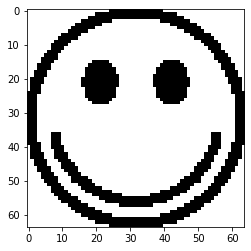

In [ ]:
# import an image that we will use as first motif
img = np.loadtxt('smiley.dat')
print('the shape of the image data is ', img.shape)
plt.imshow(img, cmap='Greys_r')

In [ ]:
# create our Hopfield net
# -----------------------

# convert the 2D pixel matrix to a 1D pattern vector
nx, ny = img.shape
P0 = img.flatten()

# the network size is given by the length of the pattern
N = len(P0)

# for a single pattern, the weight matrix is given by
W = P0[:,None] * P0[None,:] / N

# enforce empty diagonal (no self-connections)
W[np.arange(N),np.arange(N)] = 0

In [ ]:
W.shape

(4096, 4096)

In [ ]:
# define some useful functions you can use below
# ----------------------------------------------

# gain function
def g(h, beta=1.):
    """Gain function: probability of a neuron to be 
    in the active state given the input h, for a 
    given value of beta (default value 1)."""
    return 1/(1+np.exp(-beta*h))


# overlap between a given pattern and a state
def overlap(state, pattern):
    return sum(state*pattern)/N


# a plot function to easily plot the 
# network state as an image
def plot_state(state):
    plt.imshow(state.reshape((nx,ny)), cmap='Greys_r')
    plt.pause(1)

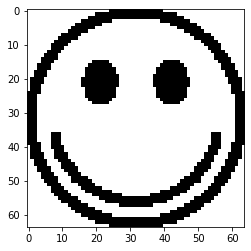

In [ ]:
# afficher le motif nous avons encodé 
# dans la matrice de connectivité
plot_state(P0)

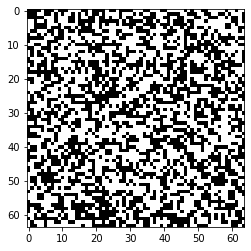

0.11572265625


In [ ]:
# start from noisy pattern and iterate 
# over time

# number of time steps
nt = 5

# create state array for all times
S = np.ones((nt,N))

# noisy initial state
# NOTE: values must be either -1 or 1
S[0] = 2*np.round(np.random.uniform(size=N)) - 1

# add partial overlap to the initial state
nover = 400
inds = np.random.choice(N,size=nover,replace=False)

S[0,inds] = P0[inds]

plot_state(S[0])
print(overlap(S[0],P0))

In [ ]:
# Astuce 1 : produit d'une matrice avec un vecteur

# une matrice
A = np.array([[1,2],
              [2,3]])

# un vecteur
b = np.array([1,2])

# le produit y = A.b

# 1) avec des boucles for
y = np.zeros(2)
for i in range(2):
    for j in range(2):
        y[i] += A[i,j]*b[j]
print(y)

# 2) avec numpy
y = A.dot(b) # <-------- w.S
print(y)

[5. 8.]
[5 8]


In [ ]:
# Astuce 2 : nombre aléatoire -1 ou 1 en fonction de 
# la probabilité p pour 1. pour cela, il faut

p = 0.5 # exemple

# (1) comparer une nombre aléatoire entre [0,1) à p
is_up = np.random.rand() < p

# (2) transformer le résultat (True ou False) en 1 ou -1s = 2*int(is_up) - 1
s = 2*is_up - 1

print('une seule valeur :')
print(is_up, s)

# cela marche aussi pour beaucoup de valeurs en parallèle
is_up = np.random.rand(10) < p 

s = 2*is_up - 1
print('un array de plusieurs valeurs à la fois :')
print(is_up, s)


une seule valeur :
False -1
un array de plusieurs valeurs à la fois :
[False False  True False  True False  True False  True  True] [-1 -1  1 -1  1 -1  1 -1  1  1]


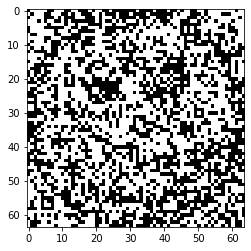

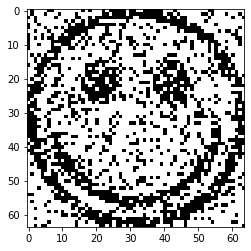

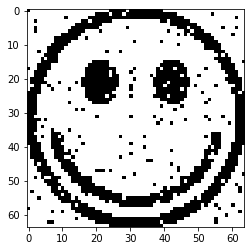

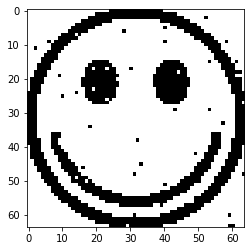

In [ ]:
# la dynamique du réseau
# ======================

# On connait S[0] (état initial)
# --> on veut connaître S[1], S[2], ..., S[nt-1]
beta = 5

for it in range(nt-1):
    # S[it+1] = ?

    # 1) calculer les entrées synaptiques
    h = W.dot(S[it])
    # h.shape = (N,) 

    # 2) déterminer la probabilité pour chaque neurone d'être +1
    p = g(h, beta)

    # 3) tirage au sort des nouveaux S_i
    is_up = np.random.uniform(size=N) < p
    
    # +1 si is_up is True, -1 si False
    S[it+1] = 2*is_up - 1 

    # 4) ... 
    plot_state(S[it+1])


### Exercise 3 : La capacité du réseau 

Sous la condition que les différents motifs à retenir ne sont pas corrélés, la capacité d'un réseau de taille $N$ est donné par $c_{\rm crit} = 0.138$. 

1. Jusqu'à combien de motifs $K$ peut-on stocker dans le réseau que vous avez simulé ci-dessus ? 


Du point de vue d'un motif donné, l'effet des autres $K-1$ motifs sur les connectivités synaptiques revient à un bruit supplémentaire correspondant à la somme de $K-1$ nombres aléatoires d'une valeur $-1/N$ ou $1/N$ à probabilité égale.  

$\begin{aligned}
w_{ij} &= \frac{1}{N}\sum_\mu P^\mu_i P^\mu_j \quad (i\neq j) \\
&= \frac{1}{N} P^0_i P^0_j  + \frac{1}{N}\sum_{\mu\neq 0} P^\mu_i P^\mu_j \quad (i\neq j)
\end{aligned}$

2. Quel est la moyenne et l'écart-type pour une somme de $M$ valeurs aléatoires $x_k \in \{-a,a\}$ (où $-a$ et $a$ ont la probabilité 0.5 chacune) ? Pour $M\gg1$, quelle distribution suivent les $X=\sum_{k=1\ldots M}x_k$ ?


3. Montrez qu'en ajoutant des valeurs aléatoires qui correspondent à $K-1$ d'autres motifs à la matrice de connectivité, où $K<K_{\rm max}$, le motif initial peut toujours être récupéré. 


4. Qu'est-ce qui se passe si vous rajoutez un bruit qui correspond à un nombre de motifs au-dela de la capacité de stockage ?

In [ ]:
print('Nous pouvons stocker ~ %d motifs dans notre réseau'%(0.138*N))

Nous pouvons stocker ~ 565 motifs dans notre réseau


In [ ]:
# Point 2
# -------

# moyenne de X ?
M = 200
a = 1

X_moyenne = 0.0
# X_moyenne = M*[p(-a)*(-a) + p(a)*a] = 0

# X_variance = [p(-a)*(-a)**2 + p(a)*a**2]
# = 0.5*M*[a**2 + a**2] = a**2
X_variance = M*a**2

# X_ecart_tye = np.sqrt(X_variance)
X_ecart_type= np.sqrt(M)*a

nrepeat = 3000
x = a * (2 * (np.random.uniform(size=(nrepeat,M))<0.5) - 1)
X = np.sum(x, axis=1)


In [ ]:
x[:10,:10]

array([[-2, -2,  2, -2, -2,  2, -2,  2, -2,  2],
       [-2,  2,  2,  2,  2, -2,  2, -2,  2,  2],
       [ 2,  2,  2,  2, -2,  2,  2,  2,  2, -2],
       [-2,  2, -2, -2,  2, -2, -2, -2,  2,  2],
       [ 2, -2, -2, -2,  2, -2,  2,  2, -2, -2],
       [-2,  2, -2, -2,  2, -2, -2,  2,  2,  2],
       [ 2,  2, -2,  2,  2,  2, -2, -2, -2,  2],
       [-2,  2,  2,  2, -2, -2,  2, -2, -2,  2],
       [ 2,  2, -2,  2,  2, -2, -2,  2, -2, -2],
       [-2, -2, -2,  2,  2,  2, -2, -2, -2, -2]])

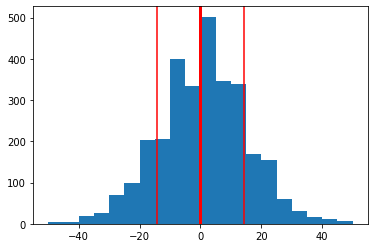

In [ ]:

fig, ax = plt.subplots()
ax.hist(X, bins=20)
ax.axvline(X_moyenne, c='r', lw=3)
ax.axvline(X_moyenne - X_ecart_type, c='r')
ax.axvline(X_moyenne + X_ecart_type, c='r')


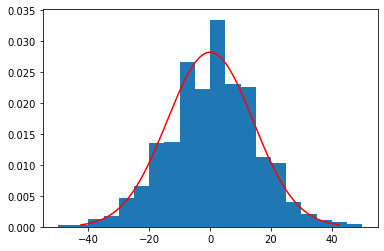

In [ ]:
x = np.linspace(-3*X_ecart_type, 3*X_ecart_type, 200)
y = 1/np.sqrt(2*np.pi*X_variance)*np.exp(-x**2/(2*X_variance))

fig, ax = plt.subplots()
ax.hist(X, bins=20, density=True)
ax.plot(x, y, c='r')